In [10]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

plt.rcParams['figure.figsize'] = (16.0, 4.0)

FILE_NAMES = ('train_32x32.mat', 'test_32x32.mat', 'extra_32x32.mat')

In [2]:
os.chdir('../../data/raw/svhn_dataset')

In [3]:
os.getcwd(), os.listdir()

('D:\\untitled1\\data\\raw\\svhn_dataset',
 ['extra_32x32.mat', 'test_32x32.mat', 'train_32x32.mat'])

In [4]:
def _load_mat(path):
    data = loadmat(path)
    return data['X'], data['y']

In [5]:
X, Y = _load_mat(FILE_NAMES[0])
X.shape, Y.shape

((32, 32, 3, 73257), (73257, 1))

In [6]:
X = X.transpose((3,0,1,2))
Y = Y[:, 0]

X.shape, Y.shape

((73257, 32, 32, 3), (73257,))

In [41]:
# replace label "10" for 0 to label "0"
Y[np.where(Y == 10)] = 0

In [42]:
def plot_images(imgs, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for _, ax in enumerate(axes.flat): 
        i = np.random.randint(0, imgs.shape[0])
        ax.imshow(imgs[i])
        ax.set_title(labels[i])
        ax.set_xticks([]); ax.set_yticks([])

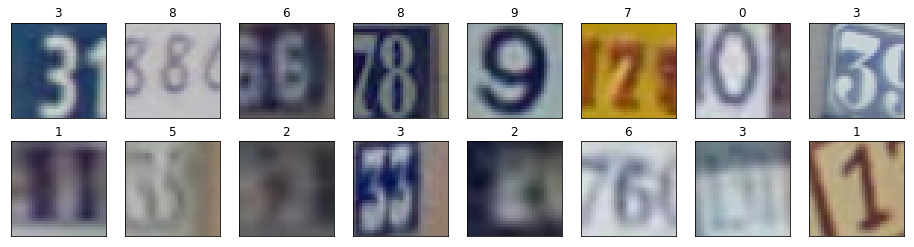

In [43]:
plot_images(X, Y, 2, 8)

(array([ 4948., 13861., 10585.,  8497.,  7458.,  6882.,  5727.,  5595.,
         5045.,  4659.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

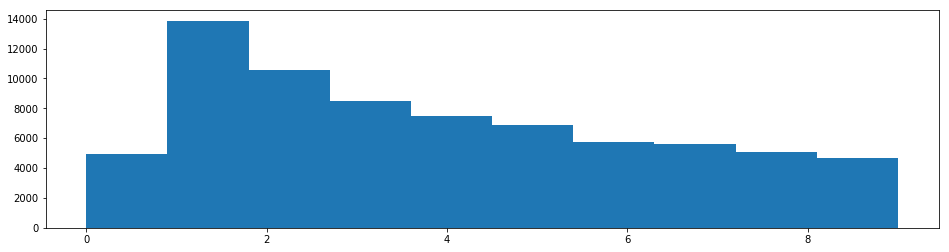

In [44]:
plt.hist(Y)

#Data is unbalanced

In [46]:
def sample_to_balance(x, y):
    """Because the dataset is not balanced, we take at most the mean number of instances per class."""
    np.random.seed(42)
    num_to_sample = int(np.bincount(y.flatten()).mean())
    all_sampled_inds = []
    for label in np.unique(y.flatten()):
        inds = np.where(y == label)[0]
        sampled_inds = np.unique(np.random.choice(inds, num_to_sample))
        all_sampled_inds.append(sampled_inds)
    ind = np.concatenate(all_sampled_inds)
    x_sampled = x[ind]
    y_sampled = y[ind]
    return x_sampled, y_sampled

In [47]:
X_, Y_ = sample_to_balance(X, Y)

(array([3796., 5667., 5294., 4894., 4624., 4469., 4128., 4104., 3857.,
        3678.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

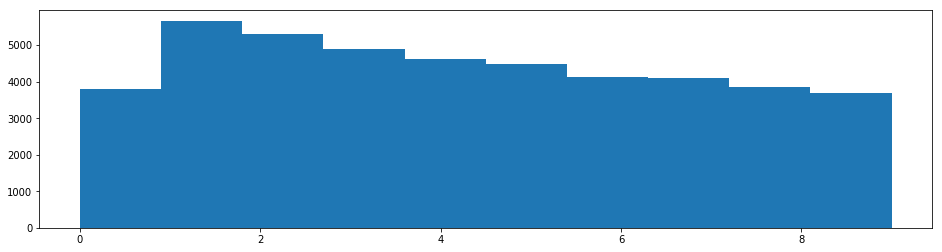

In [48]:
plt.hist(Y_)

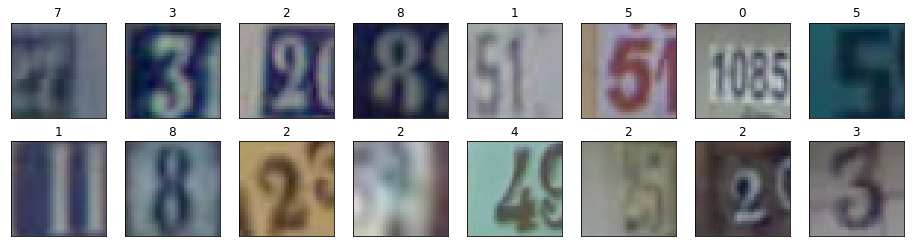

In [49]:
# check
plot_images(X_, Y_, 2, 8)